In [25]:
#import necessary libraries
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import re
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
#from PIL import Image
from nltk.corpus import stopwords

In [26]:
global folder_name

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [27]:
def process_twitter_text(data):
    data=[re.sub(r'&[A-Za-z0-9]+','',text) for text in data]
    data=[re.sub(r'@[A-Za-z0-9]+','',text) for text in data]
    data=[re.sub('https?://[A-Za-z0-9./]+','',text) for text in data]
    data=[re.sub('[^A-Za-z0-9 ]+', '', text) for text in data]
    data=[re.sub('https?://[A-Za-z0-9./]+','',text) for text in data]
    data=[re.sub(' +', ' ', text) for text in data]
    data=[text.lower() for text in data]
    return data

In [28]:
def process_text(senti_df, senti_value, bg_color):
    df=senti_df.loc[senti_df["Customer sentiment / tone"] == senti_value]
    #Text processing
    #Concat 
    text=df["tweet_processed"].str.cat(sep=' ')
    #Remove special characters
    text2=text.lower()
    text2= re.sub('[^A-Za-z0-9'' ]+', ' ', text2)
    
    #Tokenization
    tokens = word_tokenize(text2)
    #POS tagging - consider only NOUNS
    nouns=[word for (word, pos) in nltk.pos_tag(tokens) if pos[0] == 'N']
    
    #Lemmatization: Ignore words with samller than 3 letters
    lemmatiser = WordNetLemmatizer()
    words = [lemmatiser.lemmatize(noun.lower(), pos='n') for noun in nouns if len(noun) > 2]
    
    #Remove stop words
    stop_words = stopwords.words('english')
    stop_words.extend(["thing","became","use","comcast","week","hour","month","year","day","time","minute"])
    words_nostop = [word for word in words if word not in stop_words]

    #print(words)
    text3= ' '.join(words_nostop)
    # Generate word cloud
    word_cloud = WordCloud(width = 2000, height = 1500, random_state=1, background_color=bg_color, colormap='Set2', collocations=False, stopwords = STOPWORDS, max_words=50).generate(text3)
    
    # Plot
    #print("############### {} Sentiment Word Cloud #####################".format(senti_value))
    plot_cloud(word_cloud)
    file_name=folder_name + "/output/" + senti_value + ".png"
    word_cloud.to_file(file_name)

Enter folder name(Should contain the inputfile i.e labelled with sentiments):D:\TCS\TIGO\POC deliverables - twitter data\Datasets
Enter file name:Tweets_sentiment_output.csv


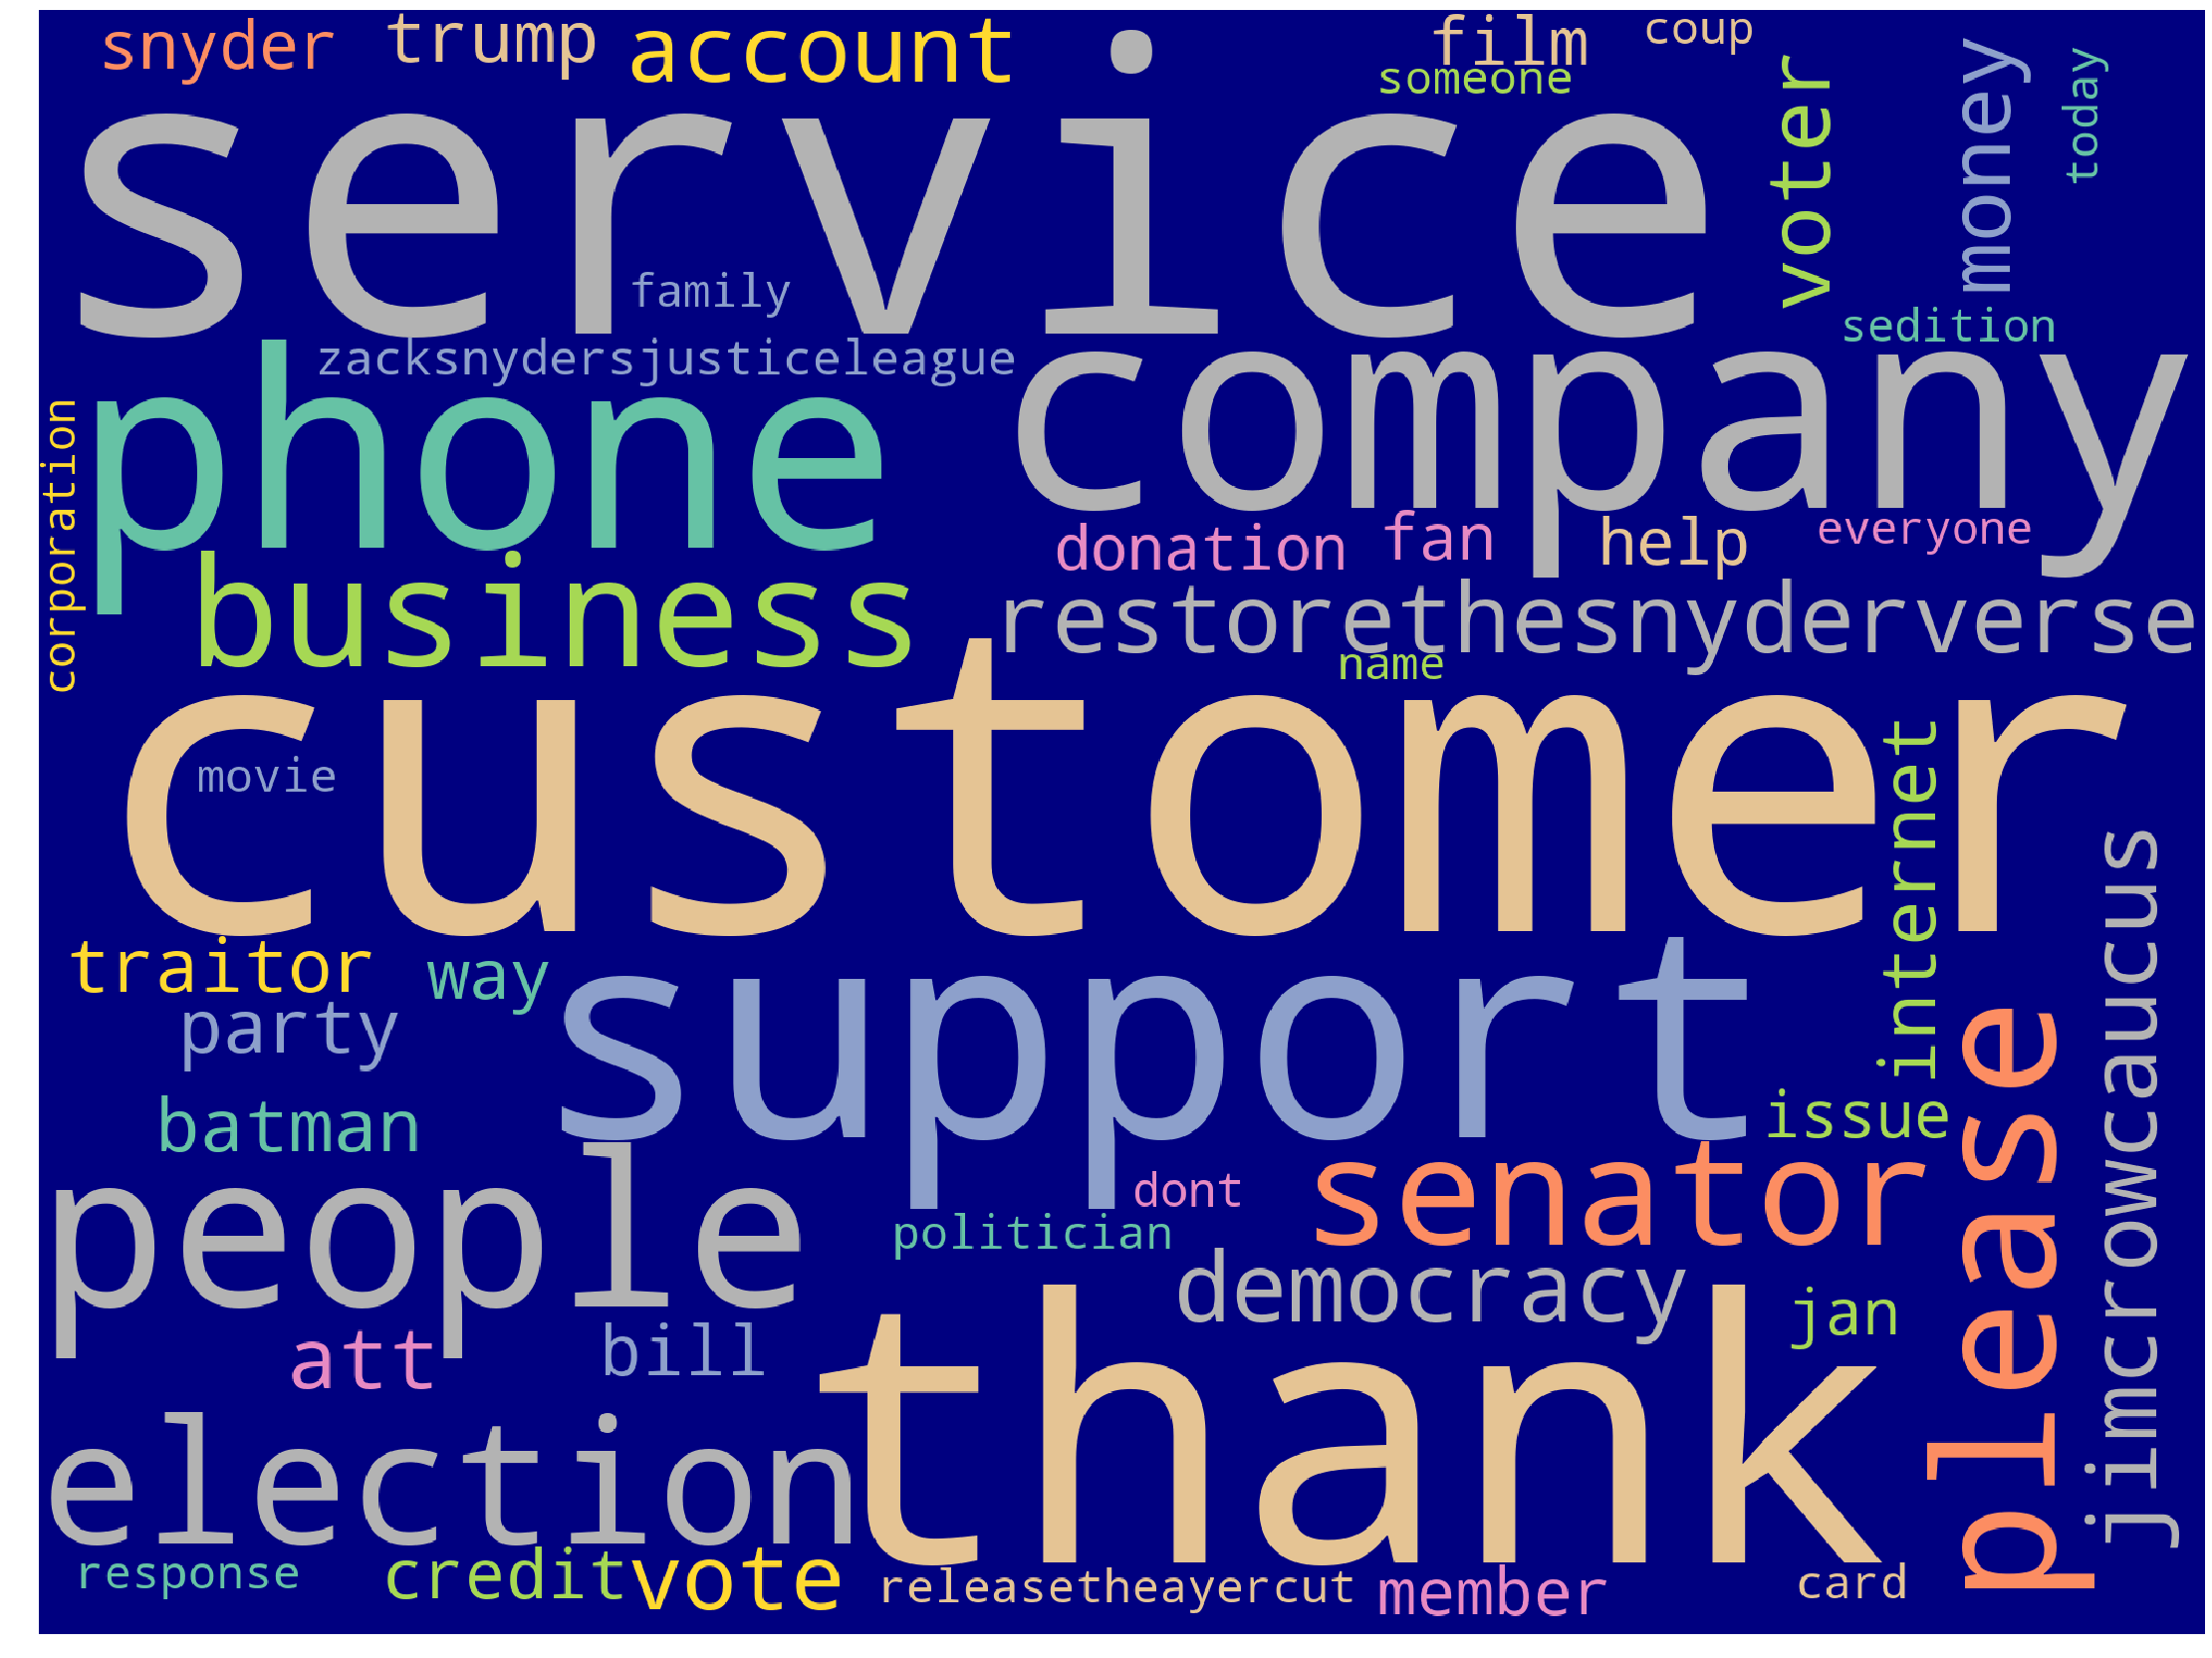

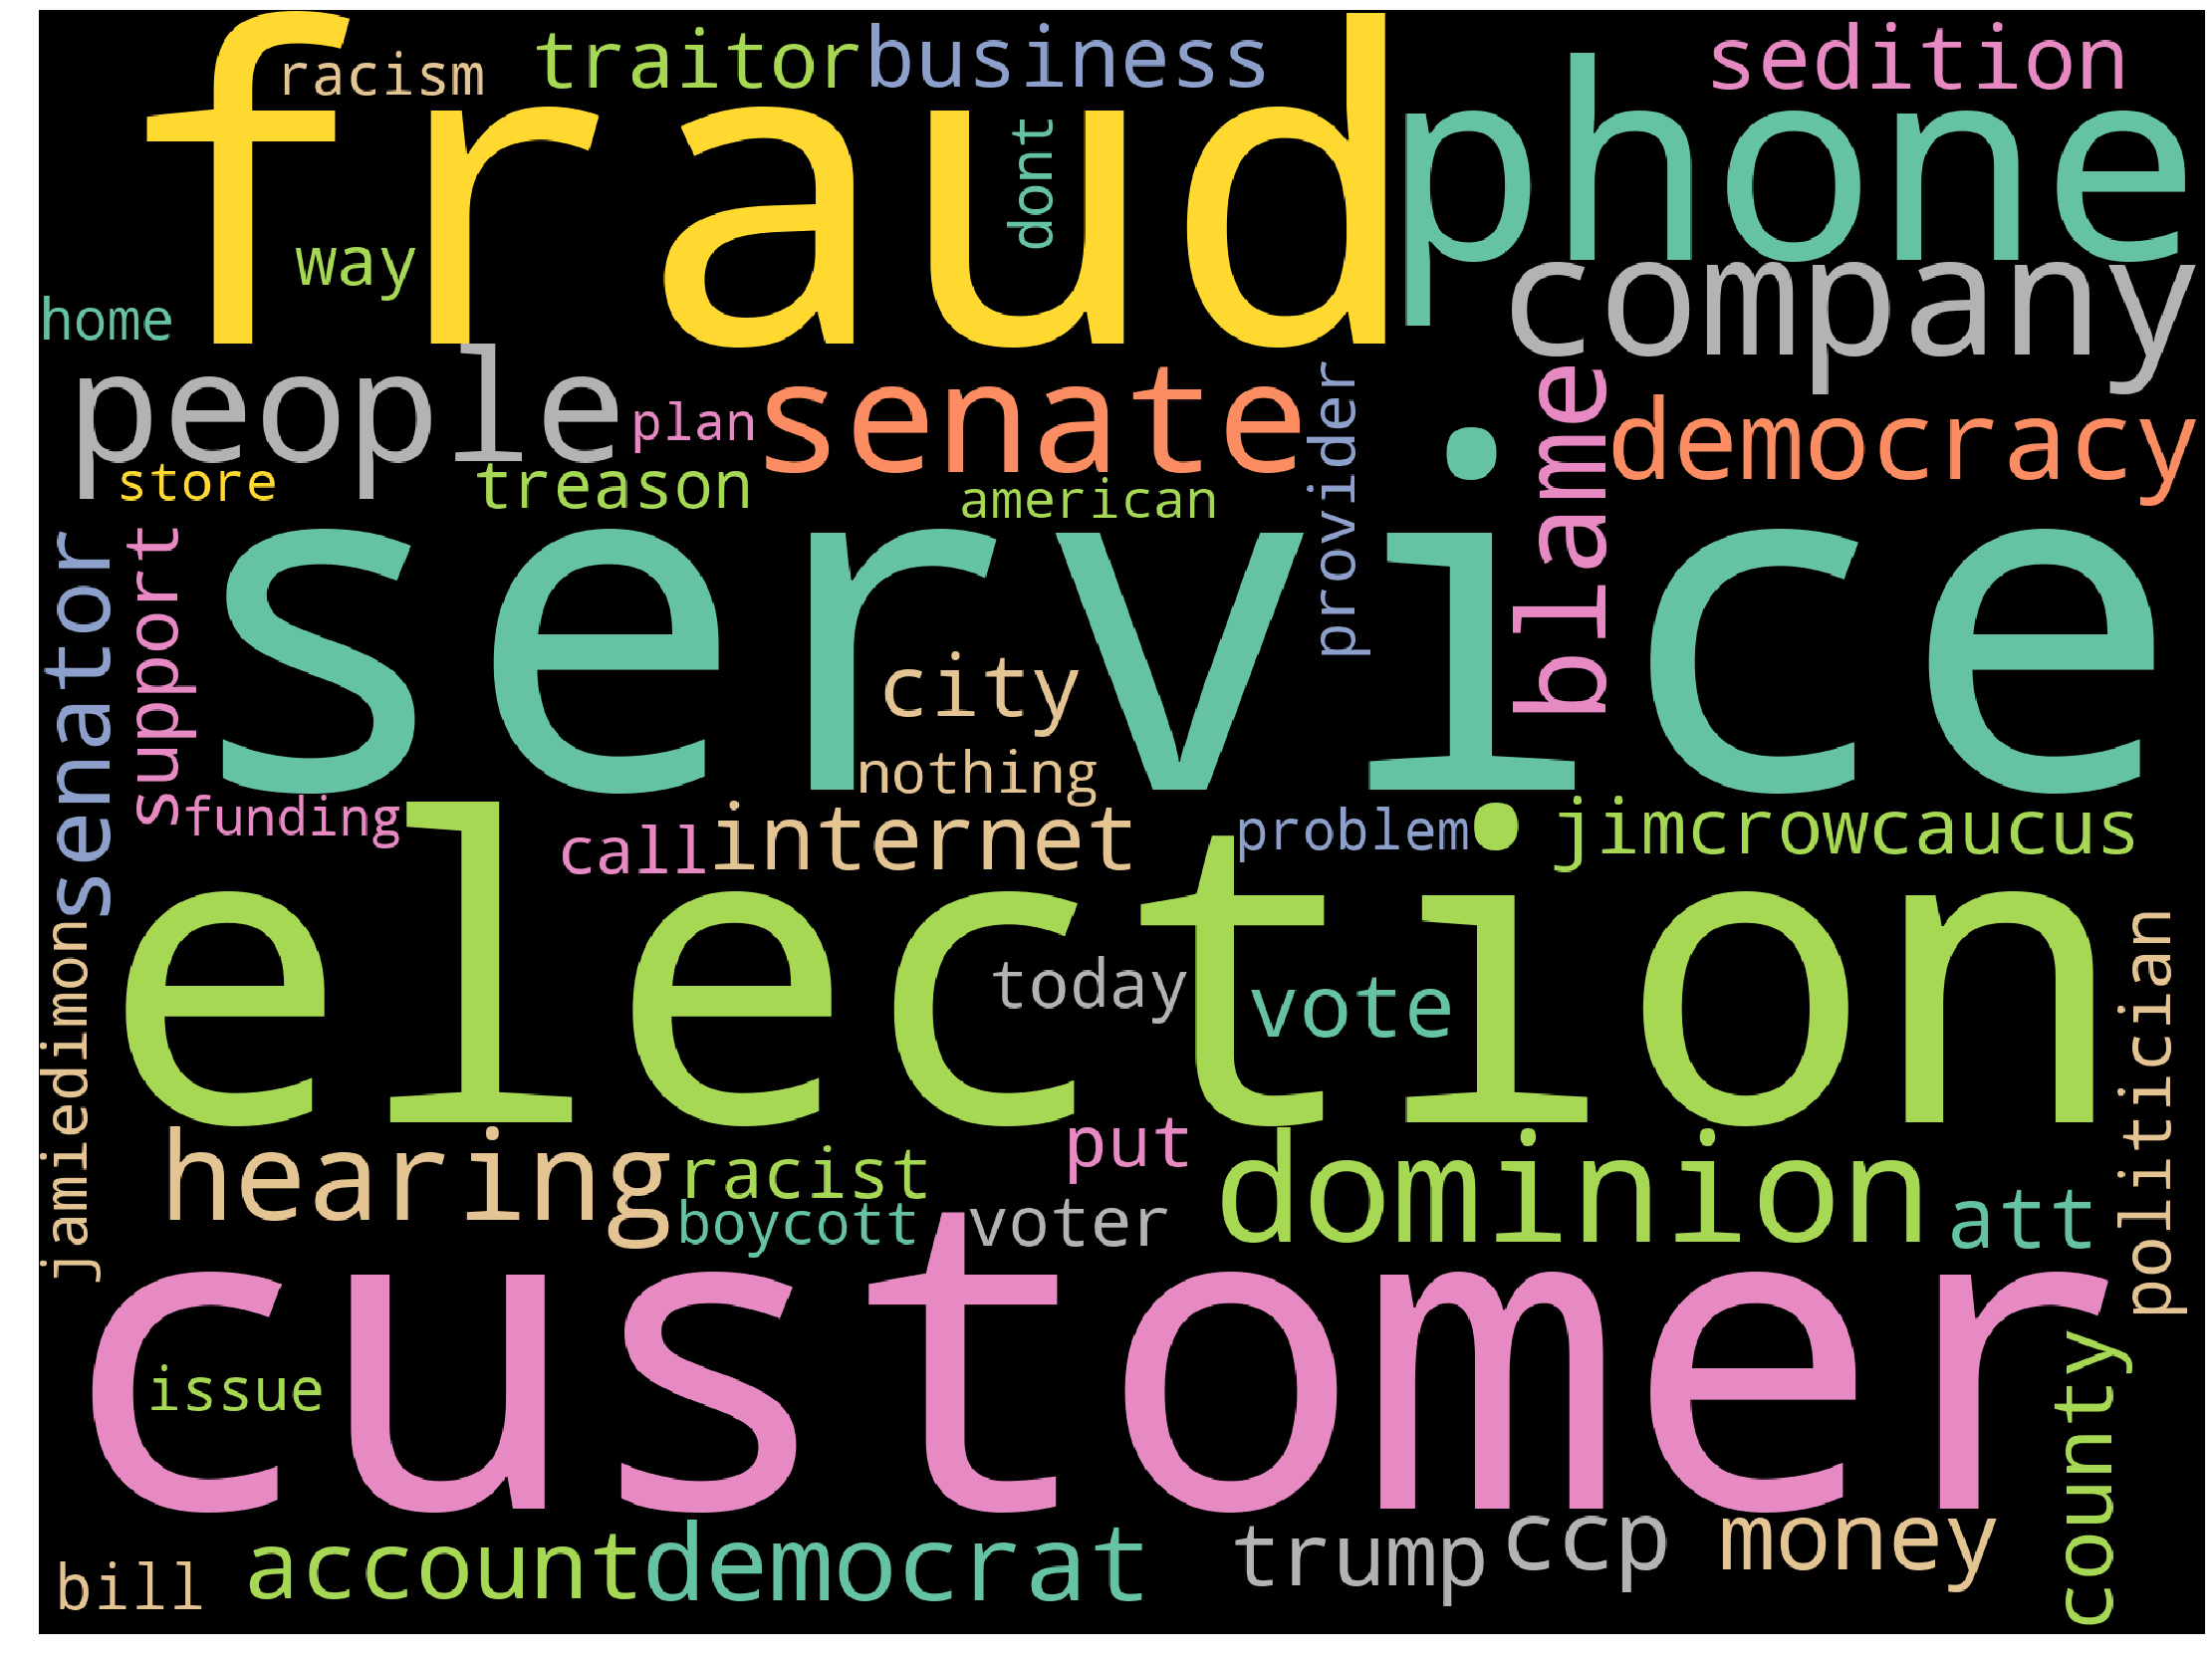

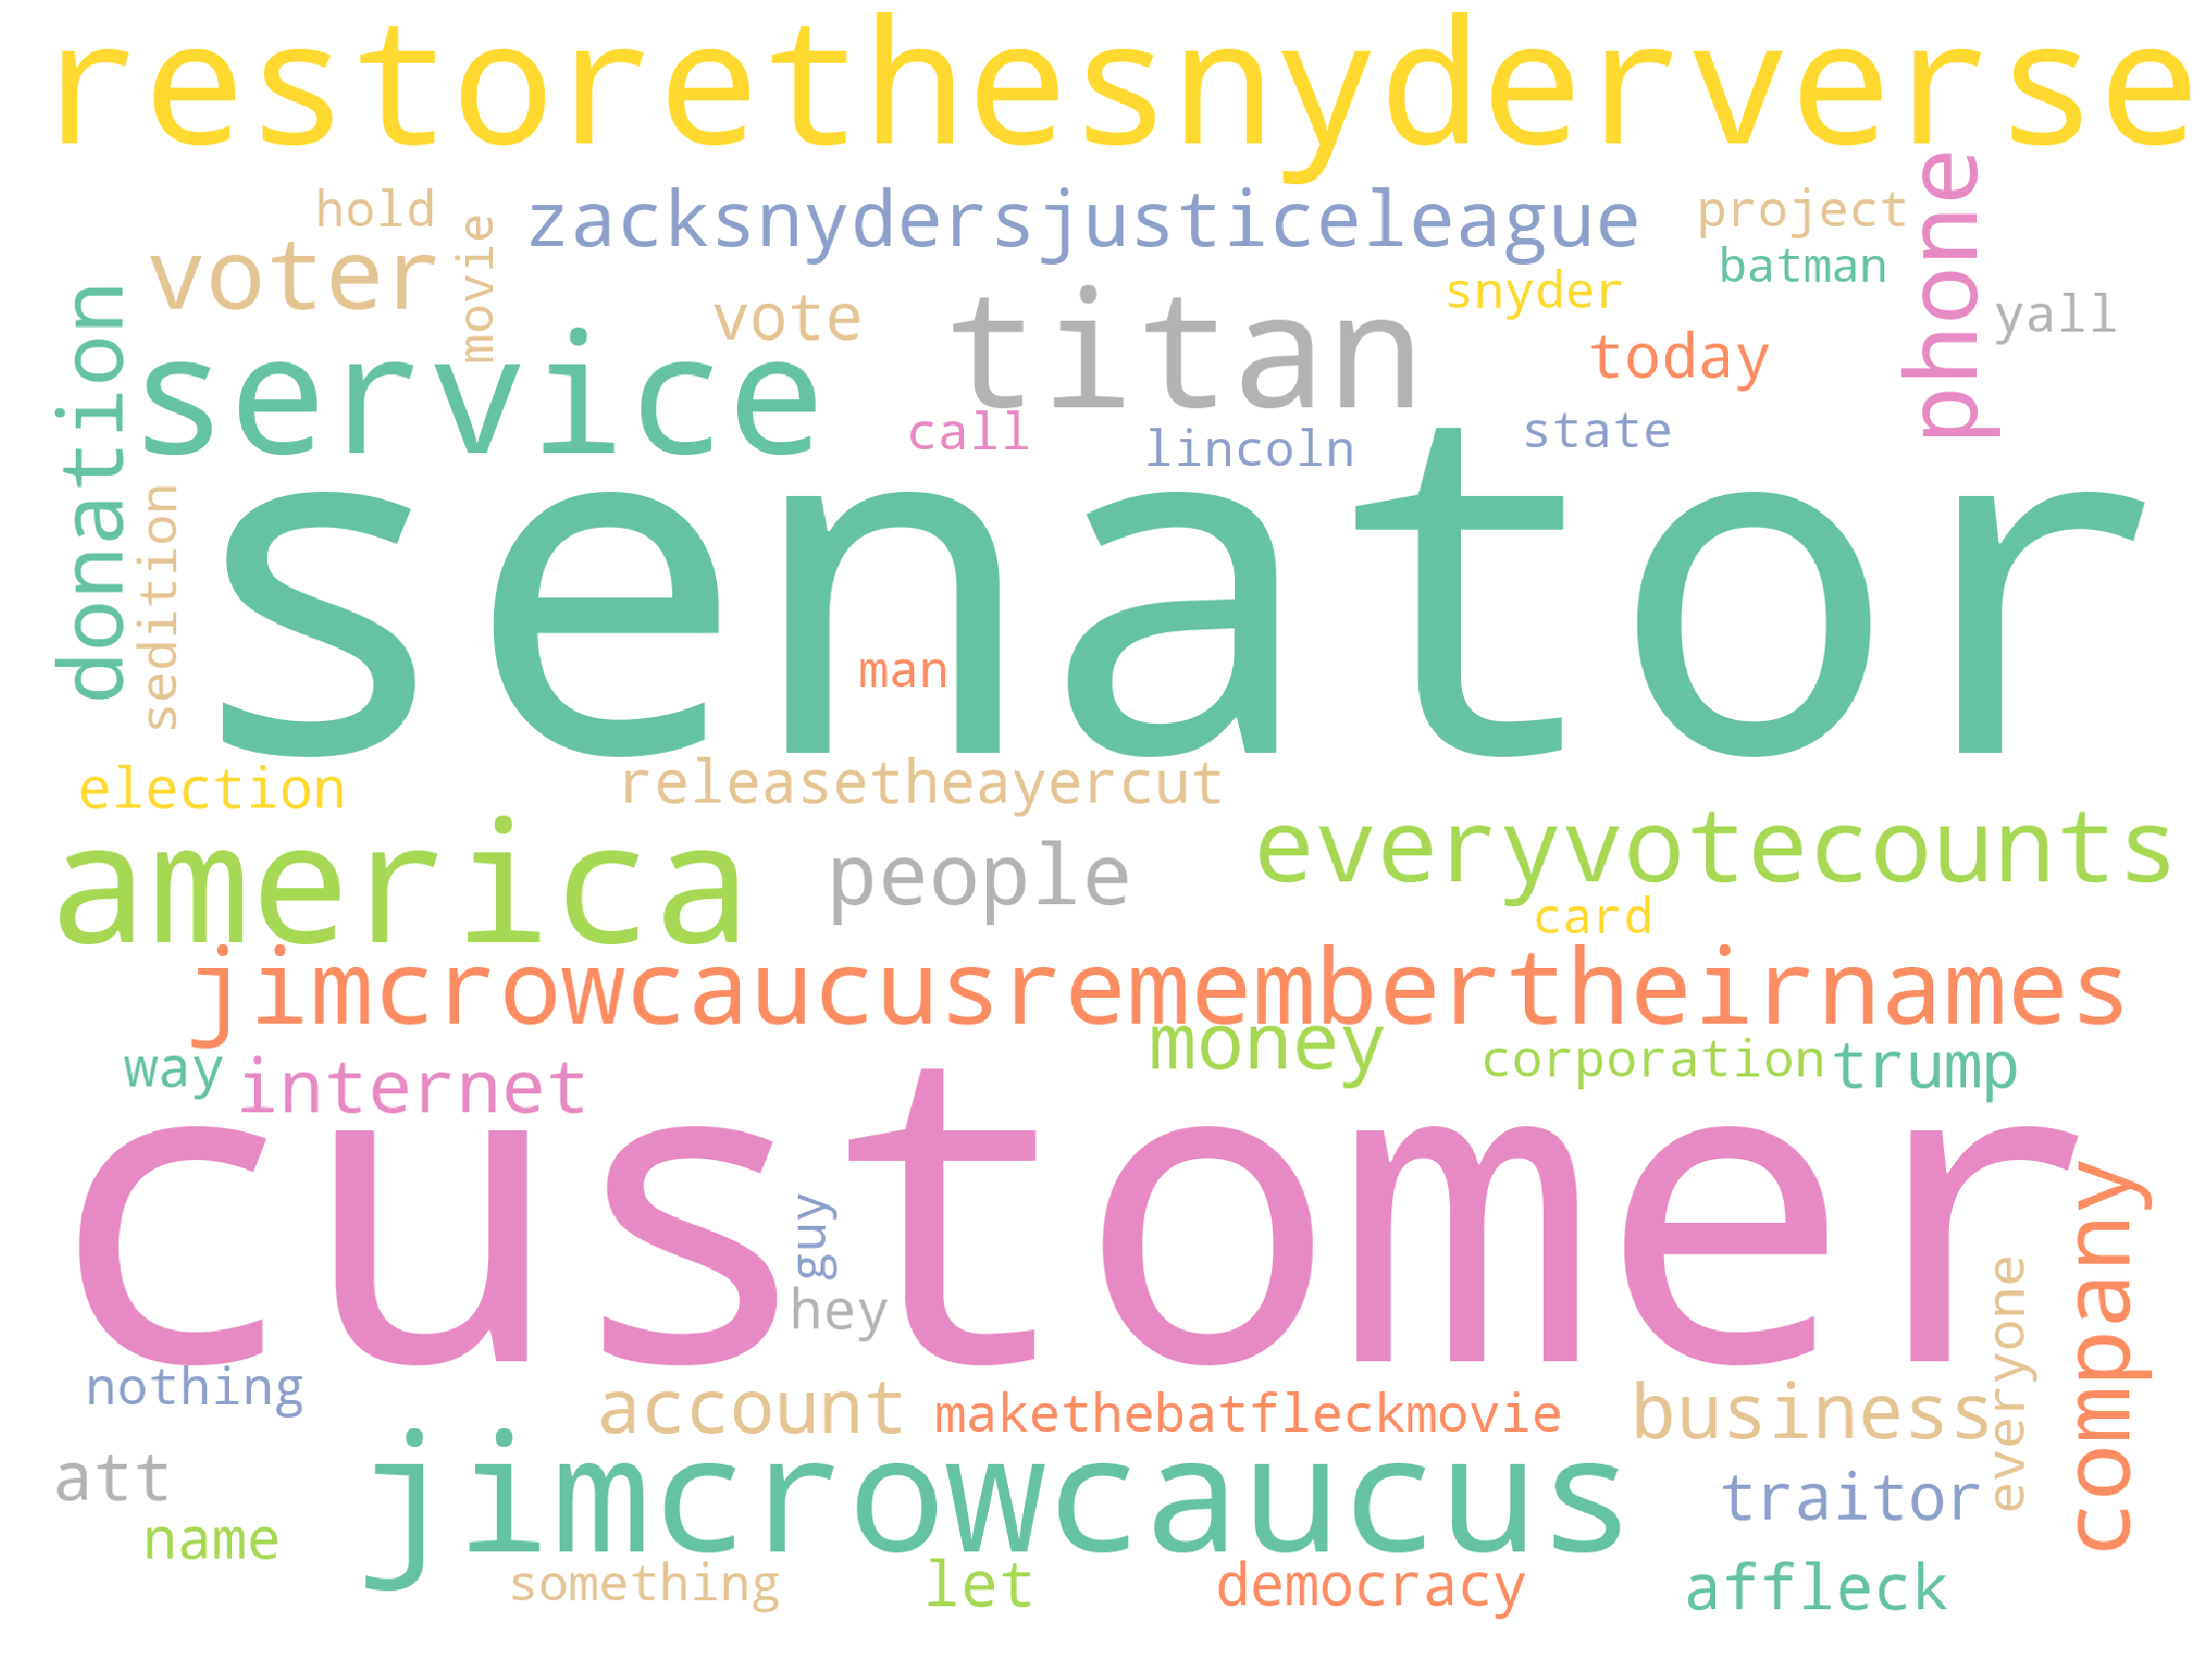

In [29]:
if __name__=="__main__":
    #Read file location from console
    folder_name = input("Enter folder name(Should contain the inputfile i.e labelled with sentiments):")
    file_name = input("Enter file name:")
    folder_name.strip()
    folder_name.strip("/")
    full_filename = folder_name+"/"+ file_name

    #Read Customer tweets and complaints labelled with sentiments - input file
    twitter_sentiment_df = pd.read_csv(full_filename)

    # Convert to list
    data = twitter_sentiment_df.Tweet.values.tolist()
    data_proc=process_twitter_text(data)
    twitter_sentiment_df['tweet_processed']=data_proc

    #Word cloud for possitive sentiments
    sentiment_value='positive'
    bg_color='navy'
    process_text(twitter_sentiment_df, sentiment_value, bg_color)

    #Word cloud for negative sentiments
    sentiment_value='negative'
    bg_color='black'
    process_text(twitter_sentiment_df, sentiment_value, bg_color)

    #Word cloud for negative sentiments
    sentiment_value='neutral'
    bg_color='white'
    process_text(twitter_sentiment_df, sentiment_value, bg_color)